In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
np.random.seed(123456)
data_train = np.linspace(-3, 3, 100).reshape(-1, 1)
target_train = 25 * data_train**3 + 32 * data_train + 15 + np.random.randn(100, 1) * 70

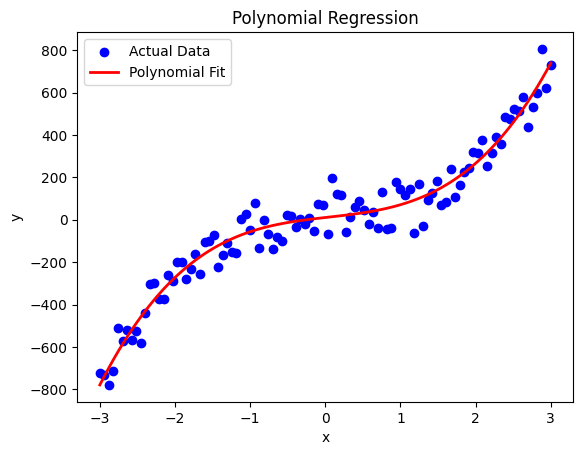

[10.6036556  40.03664579 -3.43969868 23.65831448]


In [ ]:
data_train_poly = np.hstack([data_train, data_train**2, data_train**3]) # degree of 3
data_train_poly_bias = np.hstack([np.ones((data_train_poly.shape[0], 1)), data_train_poly])

weights = np.linalg.inv(data_train_poly_bias.T.dot(data_train_poly_bias)).dot(data_train_poly_bias.T).dot(target_train)

pred = data_train_poly_bias.dot(weights)

plt.scatter(data_train, target_train, color="blue", label="Actual Data")
plt.plot(data_train, pred, color="red", linewidth=2, label="Polynomial Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression")
plt.show()

print(weights.ravel())

## With Gradient Descent

In [65]:
learning_rate = 0.001
epochs = 3000
lambda_reg = 0.1
m = len(target_train)

weights = np.random.randn(data_train_poly_bias.shape[1], 1)

for epoch in range(epochs):
    predictions = data_train_poly_bias.dot(weights)
    error = predictions - target_train
    gradients = (2/m) * (data_train_poly_bias.T.dot(error) + lambda_reg * np.vstack([np.zeros((1,1)), weights[1:]]))
    weights = weights - learning_rate * gradients

    loss = (1/m) * np.sum(error**2) + (lambda_reg/2) * np.sum(weights[1:]**2)
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

pred = data_train_poly_bias.dot(weights)

Epoch 0, Loss: 105126.5067
Epoch 100, Loss: 5373.5797
Epoch 200, Loss: 5274.8489
Epoch 300, Loss: 5194.2504
Epoch 400, Loss: 5128.4499
Epoch 500, Loss: 5074.8039
Epoch 600, Loss: 5031.1348
Epoch 700, Loss: 4995.6492
Epoch 800, Loss: 4966.8709
Epoch 900, Loss: 4943.5852
Epoch 1000, Loss: 4924.7931
Epoch 1100, Loss: 4909.6729
Epoch 1200, Loss: 4897.5498
Epoch 1300, Loss: 4887.8694
Epoch 1400, Loss: 4880.1766
Epoch 1500, Loss: 4874.0985
Epoch 1600, Loss: 4869.3291
Epoch 1700, Loss: 4865.6182
Epoch 1800, Loss: 4862.7610
Epoch 1900, Loss: 4860.5901
Epoch 2000, Loss: 4858.9690
Epoch 2100, Loss: 4857.7866
Epoch 2200, Loss: 4856.9524
Epoch 2300, Loss: 4856.3928
Epoch 2400, Loss: 4856.0484
Epoch 2500, Loss: 4855.8711
Epoch 2600, Loss: 4855.8220
Epoch 2700, Loss: 4855.8701
Epoch 2800, Loss: 4855.9904
Epoch 2900, Loss: 4856.1630


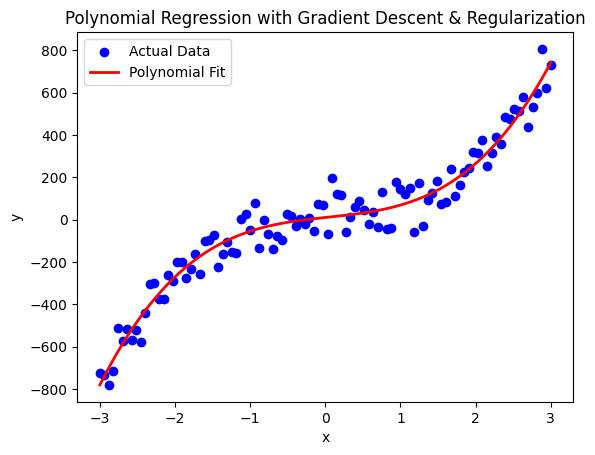

[ 9.84150316 37.90907673 -3.29752675 23.98394909]


In [66]:
plt.scatter(data_train, target_train, color="blue", label="Actual Data")
plt.plot(data_train, pred, color="red", linewidth=2, label="Polynomial Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression with Gradient Descent & Regularization")
plt.show()

print(weights.ravel())